In [1]:
print("Hello Linh")

Hello Linh


In [2]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [3]:
with open('hand_written.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    for row in result:
        rows.append(row)

In [9]:
# print(rows[2])

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '177', '255', '188', '13', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '130', '255', '255', '255', '161', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '55', '242', '255', '246', '255', '249', '46', '0', '0', '0', 

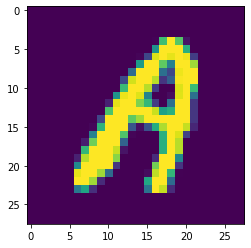

In [14]:
letter = rows[1]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)

print(letter)
plt.imshow(x)
plt.show()

In [15]:
arr = rows
train_data = []
train_label = []

for letter in arr:
    if (letter[0] == '0') or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
        x = np.array([int(j) for j in letter[1:]])
        x = x.reshape(28, 28)
        train_data.append(x)
        train_label.append(int(letter[0]))
    else:
        break

In [17]:
print(train_data[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2 177
  255 188  13   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 130 255
  255 255 161   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  55 242 255
  246 255 249  46   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 139 255 255 192
  112 255 255 219   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  89 255 25

In [28]:
import random

shuffle_order = list(range(56081))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

In [29]:
print(train_data.shape)
train_x = train_data[:50000]
train_y = train_label[:50000]

val_x = train_data[50000:53000]
val_y = train_label[50000:53000]

test_x = train_data[53000:]
test_y = train_label[53000:]

(56081, 28, 28)


In [35]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers import regression
from tflearn.data_utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow.python.estimator'